**Abdullah bin Masood**

*Homework 2*

# STOCK MARKET PREDICTION

In [1]:
!git clone "https://github.com/Parasgr7/Google-Stock-Price-Prediction.git"

Cloning into 'Google-Stock-Price-Prediction'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33
Unpacking objects: 100% (33/33), done.


In [2]:
!ls

Google-Stock-Price-Prediction  sample_data


In [3]:
%cd Google-Stock-Price-Prediction

/content/Google-Stock-Price-Prediction


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import HeNormal
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Loading data into pandas

In [67]:
data = pd.read_csv("Google_Stock_Price_Train.csv")

In [68]:
data.head(5)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [69]:
data_dyears = []
for i, date in enumerate(data.Date):
  data_dyears.append(date[-4:])

In [70]:
print (data_dyears)

['2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012',

Standardise fun:

In [71]:
def standardise(x):
  x = x - np.mean(x) 
  x = x / np.std(x)
  return x

In [72]:
data['Year'] = data_dyears
data['Open'] = standardise(data['Open'])
data.head(5)

,Date,Open,High,Low,Close,Volume,Year
0,1/3/2012,-1.372855,332.83,324.97,663.59,"7,380,500",2012
1,1/4/2012,-1.333209,333.87,329.08,666.45,"5,749,400",2012
2,1/5/2012,-1.342692,330.75,326.89,657.21,"6,590,300",2012
3,1/6/2012,-1.352505,328.77,323.68,648.24,"5,405,900",2012
4,1/9/2012,-1.393995,322.29,309.46,620.76,"11,688,800",2012


In [74]:
data_30_days = []

data_next_day = []

for year in ['2012', '2013', '2014', '2015']:
  data_open = list(data.loc[data['Year'] == year].Open)
  # print(data.loc[data['Year'] == year])
  for i in range(30, len(data_open)-1):
    data_30_days.append(data_open[i-30:i])
    data_next_day.append(data_open[i+1])

data_30_days = np.array(data_30_days)
data_next_day = np.array(data_next_day)


In [75]:
data_30_days.shape

(882, 30)

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(data_30_days, data_next_day, test_size=0.33, random_state=42)


In [77]:
X_train.shape


(590, 30)

In [78]:
initializer = HeNormal()

model = Sequential()
model.add(LSTM(30, input_shape = (X_train.shape[1], 1), return_sequences = True, kernel_initializer=initializer, activation = 'relu'))
model.add(LSTM(20, activation = 'relu', return_sequences = True))
model.add(LSTM(10, activation = 'relu', return_sequences = True))
model.add(LSTM(5, activation = 'relu'))

model.add(Dense(1))

In [79]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train, Y_train, epochs = 225, validation_data=(X_test, Y_test))

Epoch 1/225
19/19 [==============================] - 6s 84ms/step - loss: 0.3478 - val_loss: 0.2048
Epoch 2/225
19/19 [==============================] - 1s 50ms/step - loss: 0.1563 - val_loss: 0.1787
Epoch 3/225
19/19 [==============================] - 1s 50ms/step - loss: 0.1317 - val_loss: 0.1428
Epoch 4/225
19/19 [==============================] - 1s 50ms/step - loss: 0.0896 - val_loss: 0.0471
Epoch 5/225
19/19 [==============================] - 2s 85ms/step - loss: 0.0504 - val_loss: 0.0450
Epoch 6/225
19/19 [==============================] - 1s 51ms/step - loss: 0.0392 - val_loss: 0.0335
Epoch 7/225
19/19 [==============================] - 1s 51ms/step - loss: 0.0336 - val_loss: 0.0322
Epoch 8/225
19/19 [==============================] - 1s 50ms/step - loss: 0.0517 - val_loss: 0.0405
Epoch 9/225
19/19 [==============================] - 1s 49ms/step - loss: 0.0321 - val_loss: 0.0327
Epoch 10/225
19/19 [==============================] - 1s 50ms/step - loss: 0.0298 - val_loss: 0.0278

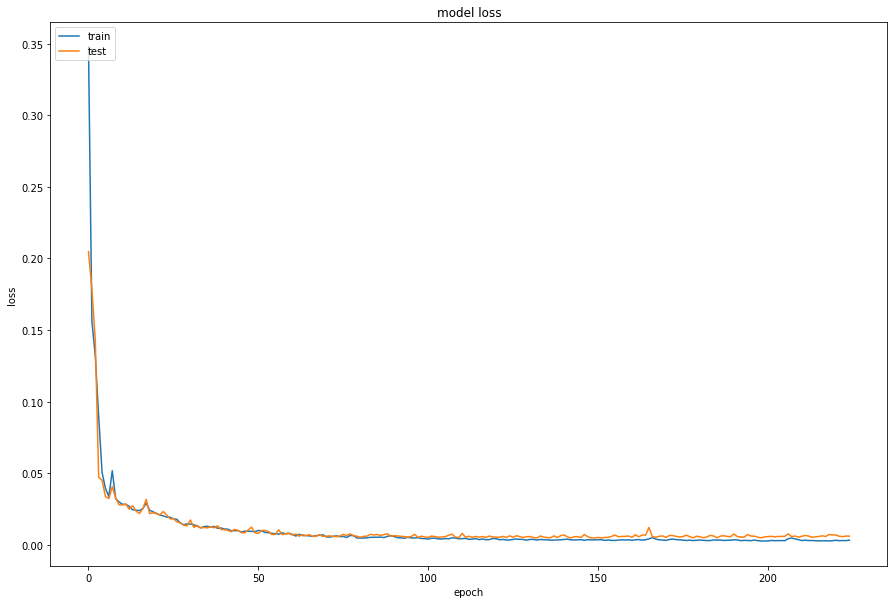

In [80]:
fig = plt.figure(figsize = [15,10])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [81]:
data_30_days_for_prediction = []
data_next_day_for_prediction = []

data_open_for_prediction = list(data.loc[data['Year'] == '2016'].Open)
for i in range(30, len(data_open_for_prediction)-1):
    data_30_days_for_prediction.append(data_open_for_prediction[i-30:i])
    data_next_day_for_prediction.append(data_open_for_prediction[i+1])
    
data_30_days_for_prediction = np.array(data_30_days_for_prediction)
data_next_day_for_prediction = np.array(data_next_day_for_prediction)

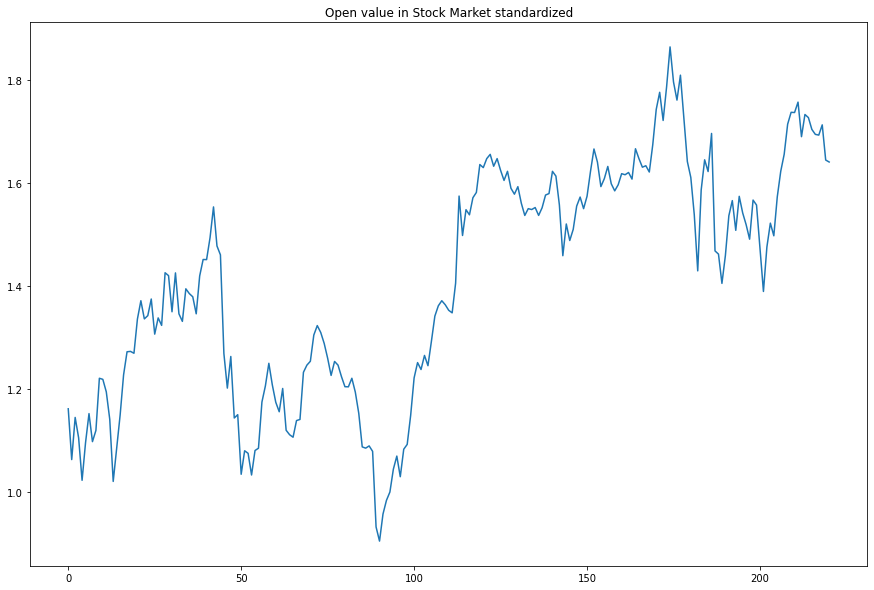

In [82]:
fig = plt.figure(figsize = [15,10])
plt.plot(np.arange(len(data_next_day_for_prediction)), data_next_day_for_prediction)
plt.title("Open value in Stock Market standardized")

plt.show()

In [83]:
predictions = []

for data_30_days in data_30_days_for_prediction:
  pred = model.predict(np.array(data_30_days).reshape(1,30))
  predictions.append(pred[0][0])

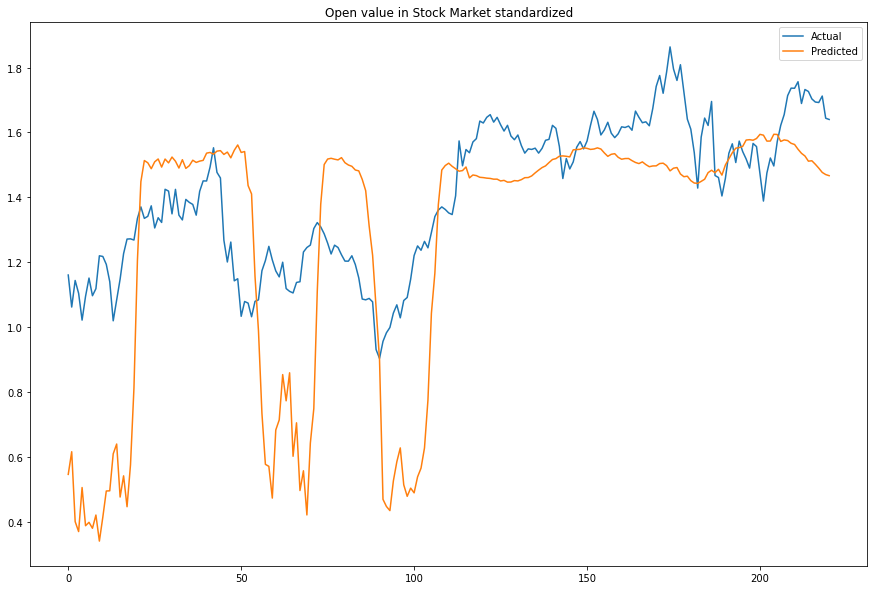

In [84]:
fig = plt.figure(figsize = [15,10])
plt.plot(np.arange(len(data_next_day_for_prediction)), data_next_day_for_prediction, label='Actual')
plt.plot(np.arange(len(predictions)), predictions, label='Predicted')
plt.title("Open value in Stock Market standardized")
plt.legend()

plt.show()